# Simple Linear Regression

In [11]:
import numpy as np
import torch
from torch.autograd import Variable
from random import uniform
import matplotlib.pyplot as plt

The following variables define the breadth of the generated data sets used for training:

In [12]:
# Data set generation parameters
sampleSetSize = 20
startX = 0
maxNoise = 3

# Model file path
modelPath = "/tmp/simple_linear_regression.pt"

# Enable GPU
enableGpu = torch.cuda.is_available()
print("Is GPU Enabled?  " + str(enableGpu))

Is GPU Enabled?  False


These are the model calibration parameters.  As the training set changes, these need to be tweaked (watch for NaN's).

In [13]:
learningRate = 0.001 
epochs = 1000

## Generate Sample Data

3x + 4

In [14]:
values_x = [i for i in range(sampleSetSize)]
values_y = [((3 * i) + 4 + uniform(maxNoise * -1, maxNoise)) for i in values_x]

Convert data to Numpy/Pytorch friendly structures

In [15]:
train_x = np.array(values_x, dtype=np.float32)
train_x = train_x.reshape(-1, 1)

train_y = np.array(values_y, dtype=np.float32)
train_y = train_y.reshape(-1, 1)

## Define Model Architecture

In [16]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [17]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'

model = linearRegression(inputDim, outputDim)
if enableGpu:
    model.cuda()

In [18]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

## Train the Model

In [19]:
model.train()
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if enableGpu:
        inputs = Variable(torch.from_numpy(train_x).cuda())
        labels = Variable(torch.from_numpy(train_y).cuda())
    else:
        inputs = Variable(torch.from_numpy(train_x))
        labels = Variable(torch.from_numpy(train_y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1003.4361572265625
epoch 1, loss 569.5631103515625
epoch 2, loss 324.5077209472656
epoch 3, loss 186.09732055664062
epoch 4, loss 107.9207534790039
epoch 5, loss 63.764495849609375
epoch 6, loss 38.823097229003906
epoch 7, loss 24.734323501586914
epoch 8, loss 16.775230407714844
epoch 9, loss 12.278180122375488
epoch 10, loss 9.736515998840332
epoch 11, loss 8.299272537231445
epoch 12, loss 7.485805511474609
epoch 13, loss 7.024660587310791
epoch 14, loss 6.762508392333984
epoch 15, loss 6.612748146057129
epoch 16, loss 6.5264692306518555
epoch 17, loss 6.476048946380615
epoch 18, loss 6.445883274078369
epoch 19, loss 6.427158355712891
epoch 20, loss 6.414898872375488
epoch 21, loss 6.406291961669922
epoch 22, loss 6.399748802185059
epoch 23, loss 6.394373893737793
epoch 24, loss 6.389660835266113
epoch 25, loss 6.385323524475098
epoch 26, loss 6.38119649887085
epoch 27, loss 6.377197742462158
epoch 28, loss 6.373263835906982
epoch 29, loss 6.369379043579102
epoch 30, los

## Plot the model

[[ 1.3043245]
 [ 4.505823 ]
 [ 7.7073216]
 [10.90882  ]
 [14.110318 ]
 [17.311817 ]
 [20.513317 ]
 [23.714815 ]
 [26.916313 ]
 [30.117811 ]
 [33.31931  ]
 [36.52081  ]
 [39.72231  ]
 [42.923805 ]
 [46.125305 ]
 [49.3268   ]
 [52.5283   ]
 [55.7298   ]
 [58.931297 ]
 [62.132797 ]]


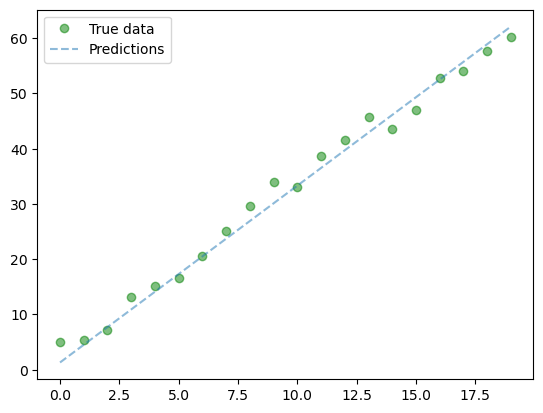

In [20]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if enableGpu:
        predicted = model(Variable(torch.from_numpy(train_x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(train_x))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(train_x, train_y, 'go', label='True data', alpha=0.5)
plt.plot(train_x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## Save and Reload the Model

In [21]:
torch.save(model.state_dict(), modelPath)

In [22]:
modelPersisted = linearRegression(inputDim, outputDim)
modelPersisted.load_state_dict(torch.load(modelPath))
modelPersisted.eval()

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

## Rerun the test simulation and plot

[[ 1.3043245]
 [ 4.505823 ]
 [ 7.7073216]
 [10.90882  ]
 [14.110318 ]
 [17.311817 ]
 [20.513317 ]
 [23.714815 ]
 [26.916313 ]
 [30.117811 ]
 [33.31931  ]
 [36.52081  ]
 [39.72231  ]
 [42.923805 ]
 [46.125305 ]
 [49.3268   ]
 [52.5283   ]
 [55.7298   ]
 [58.931297 ]
 [62.132797 ]]


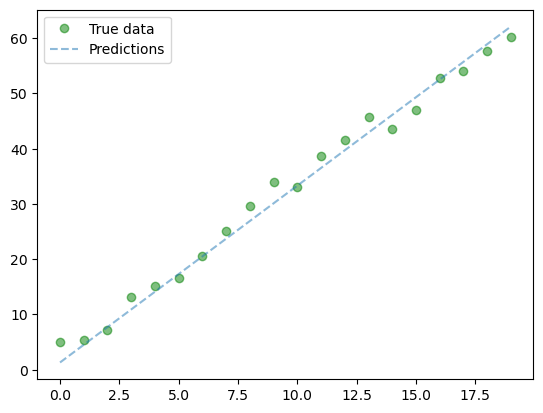

In [23]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if enableGpu:
        predicted = modelPersisted(Variable(torch.from_numpy(train_x).cuda())).cpu().data.numpy()
    else:
        predicted = modelPersisted(Variable(torch.from_numpy(train_x))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(train_x, train_y, 'go', label='True data', alpha=0.5)
plt.plot(train_x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()